In [91]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("ch:s=.25,rot=-.25", 6)
from astropy.io import ascii

## Analysing Dark Matter Corrs

In [98]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

wgplussesDM_z = []
wgcrossesDM_z = []
ggsDM_z = []
for i in range(0,585):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplussesDM_z.append(wgp)
    wgcrossesDM_z.append(wgx)
    ggsDM_z.append(wgg)
    
wgplussesDM_z = np.array(wgplussesDM_z)
wgcrossesDM_z = np.array(wgcrossesDM_z)
ggsDM_z = np.array(ggsDM_z)

corr_labels = label_table[:585]
print(corr_labels.shape)

(585, 6)


In [99]:
# Get the sorted indices based on the first column of corr_labels
param = 0
sorted_indices = np.argsort(corr_labels[:, param])
print(sorted_indices.shape)

# Sort corr_data and corr_labels using the sorted indices
sorted_wgplus = wgplussesDM_z[sorted_indices]
sorted_wgcross = wgcrossesDM_z[sorted_indices] #corr_data[sorted_indices]
sorted_wgg = ggsDM_z[sorted_indices]
# sorted_corr_labels = corr_labels[sorted_indices]

(585,)


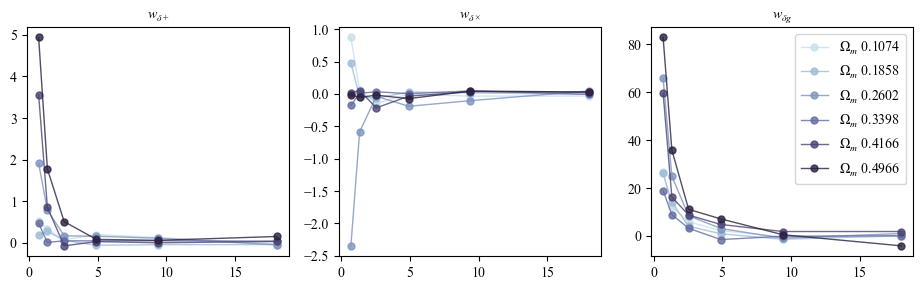

In [106]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
r = r
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(28/3,3))
for i in np.linspace(12,578,6,dtype='int'):
    ax[0].errorbar(r, sorted_wgplus[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[0].set_title(r'$w_{\delta +}$')
    ax[1].errorbar(r, sorted_wgcross[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[1].set_title(r'$w_{\delta \times}$')
    ax[2].errorbar(r, sorted_wgg[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[2].set_title(r'$w_{\delta g}$')
plt.legend()
plt.tight_layout()

## Analysing Proxy Corrs

In [113]:
# labels
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
corr_labels = np.repeat(label_table, 3, axis=0)
# plus
d = np.load("../wgplus_data.npz")
axes = ['x', 'y', 'z']
r = d['r']
corr_data = {axis: d[axis] for axis in axes}
wgplusses = np.array(corr_data['x'])
wgplusses = np.append(wgplusses, np.append(corr_data['y'],corr_data['z'],axis=0),axis=0)
# cross
d = np.load("../wgcross_data.npz")
corr_data = {axis: d[axis] for axis in axes}
wgcrosses = np.array(corr_data['x'])
wgcrosses = np.append(wgcrosses, np.append(corr_data['y'],corr_data['z'],axis=0),axis=0)
# auto
d = np.load("../wgg_data.npz")
wgg = d['wgg']


print(wgplusses.shape, wgcrosses.shape, wgg.shape, corr_labels.shape)

(3000, 6) (3000, 6) (3000, 6) (3000, 6)


In [114]:
# Get the sorted indices based on the first column of corr_labels
param = 0
sorted_indices = np.argsort(corr_labels[:, param])

# Sort corr_data and corr_labels using the sorted indices
sorted_wgplus = wgplusses[sorted_indices]
sorted_wgcross = wgcrosses[sorted_indices] #corr_data[sorted_indices]
sorted_wgg = wgg[sorted_indices]

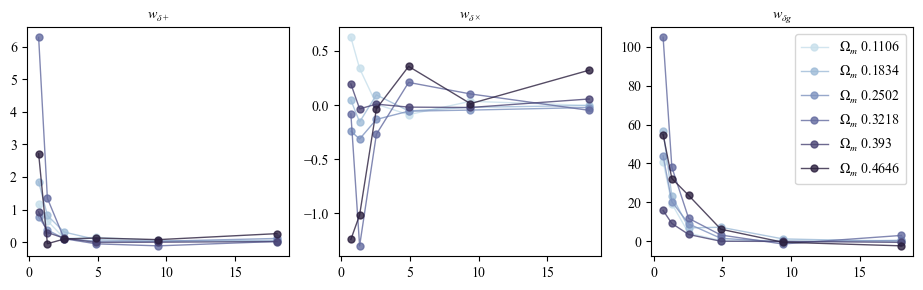

In [116]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(28/3,3))
for i in np.linspace(18,530,6,dtype='int'):
    ax[0].errorbar(r, sorted_wgplus[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[0].set_title(r'$w_{\delta +}$')
    ax[1].errorbar(r, sorted_wgcross[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[1].set_title(r'$w_{\delta \times}$')
    ax[2].errorbar(r, sorted_wgg[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[2].set_title(r'$w_{\delta g}$')
plt.legend()
plt.tight_layout()